In [124]:
import pandas as pd #importing the Pandas Library as 'pd'
from keplergl import KeplerGl #importing KeplerGl
import geopandas as gpd #importing geopandas as 'gpd'
from shapely.geometry import Point

In [62]:

map = KeplerGl(height=600, width=800)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [63]:
filename = "Liverpool.geojson"
file = open(filename)
df = gpd.read_file(file)

In [64]:
map.add_data(data=df, name="Construction")



In [84]:
! pip3 install geopy

In [65]:
# Notes on terms
# Select a type polygon
# Select geo as geometry
# Strokes refer to the width of the line
# Fill color changes the color of the polygons
# Edit the 'new layer' to change the names of the
# Press the eye icon in the exported widget to bring the layer to the top


# Adding in the foodbank information

In [43]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Liverpool_analysis")
location = geolocator.geocode("175 5th Avenue NYC")
print((location.latitude, location.longitude))

(40.741059199999995, -73.98964162240998)


In [136]:
foodbanks=pd.read_csv("Liverpool_foodbanks_geocode_input.csv")

In [137]:
foodbanks.head(n=3)

,Category,Company Name,Region,name,Street Address,City,State,Zip,Mobile Number,Website Address,Email,Reviews Average,Count Of Review
0,Charity,The Trussell Trust Food Bank,Liverpool,60 Peel Rd Bootle L20 4RW,60 Peel RdBootle L20 4RW,60 Peel Rd,BootleL20,4.0,0151 933 1300,trusselltrust.org,reg_with_fund_reg@2x.png,5.0,5.0
1,Foodbank,Christ Church Community Centre,Liverpool,8 Oxford Rd Bootle L20 9HW,8 Oxford RdBootle L20 9HW,8 Oxford Rd,BootleL20,9.0,NaN,NaN,NaN,NaN,NaN
2,Church,St Oswalds Church Centre,Liverpool,Ronald Ross Ave Netherton Bootle L30 5RD,Ronald Ross AveNetherton,Liverpool,BootleL30,5.0,0151 521 6002,NaN,NaN,3.0,3.0


In [138]:
def complete_address(x):
  if "Bootle" in x:
    return x+", Bootle, UK"
  if "Waterloo" in x:
    return x+", Waterloo, UK"
  if "Speke" in x:
    return x+", Speke, UK"
  else:
    return x+", Liverpool, UK"


foodbanks["full_address"]=foodbanks["name"].apply(complete_address)

In [139]:
def long_lat_func(x):
  try:
    location = geolocator.geocode(str(x))
    # Parse the tuple
    return location.latitude , location.longitude
  except:
    return None, None

In [140]:
foodbanks["lat"] , foodbanks["lon"] = zip(*foodbanks["full_address"].apply(long_lat_func))

In [141]:
# Subsets to drop the na terms
foodbanks=foodbanks.dropna(subset=['lon', 'lat'])

#Converts the longitude and latitude as points data to give the geocoordinates for the data frame
geometry = [Point(xy) for xy in zip(foodbanks['lon'], foodbanks['lat'])]



# Create a GeoDataFrame from art and verify the type
foodbanks_geo = gpd.GeoDataFrame(foodbanks, crs = 'epsg:4326' , geometry = geometry)

<AxesSubplot:>

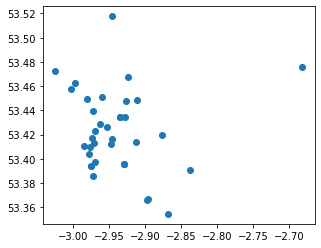

In [142]:
foodbanks_geo.plot()

In [143]:
map.add_data(data=foodbanks_geo, name="foodbanks")

# The map

In [145]:
map

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ep4jadu', 'type': …

In [36]:
# This format saved the configuration file
map.save_to_html(file_name='Liverpool4.html')

Map saved to Liverpool4.html!


In [ ]:
The map can also be served as a flask app

from flask import Flask

app = Flask(__name__)

@app.route('/')
def index():
    return map_1._repr_html_()

if __name__ == '__main__':
    app.run(debug=True)